In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('UVI_New_York_City_JFK_2000-2025.csv')

In [3]:
df

,Valid Date,Clear-sky UVI,All-sky UVI
0,2000-01-01,1.09,0.94
1,2000-01-02,1.40,0.93
2,2000-01-03,1.41,0.60
3,2000-01-04,1.43,0.67
4,2000-01-05,1.44,1.23
...,...,...,...
9078,2025-05-12,9.07,8.31
9079,2025-05-13,9.44,4.15
9080,2025-05-14,8.95,0.61
9081,2025-05-15,8.78,6.62


In [4]:
df.describe()

,Clear-sky UVI,All-sky UVI
count,9083.000000,9083.000000
mean,5.436425,4.152985
std,2.943589,2.691243
min,1.080000,0.070000
25%,2.460000,1.705000
50%,5.400000,3.570000
75%,8.210000,6.470000
max,11.440000,10.190000


In [5]:
#Check for missing data in each column
df.isna().sum()

Valid Date       0
Clear-sky UVI    0
All-sky UVI      0
dtype: int64

In [6]:
#Converting to datetime so that check for missing values is easier
df['Valid Date'] = pd.to_datetime(df['Valid Date'], format='%Y-%m-%d')


In [7]:
#Check for gaps in date ranges
#Generate list of valid dates from beginning to end of dataset
start_date = df['Valid Date'][0]
#https://stackoverflow.com/questions/60077695/how-to-get-the-last-row-value-in-pandas-through-dataframe-get-value
end_date = df['Valid Date'].iloc[-1]

#https://stackoverflow.com/questions/993358/creating-a-range-of-dates-in-python
all_possible_dates = pd.date_range(start=start_date, end=end_date).to_list()
#Format above list to match df['Valid Date'] formatting
#originally converted all_possible_dates to string, but kept as dates so sorting would be easier later on
#all_possible_dates = [time_stamp.strftime('%Y-%m-%d') for time_stamp in all_possible_dates]

#Use set subtraction to see if dates are missing from dataset
all_possible_dates = set(all_possible_dates)
dates_in_dataset = set(df['Valid Date'])
missing_dates = all_possible_dates - dates_in_dataset

In [8]:
print("Number of missing dates: ", len(missing_dates))

Number of missing dates:  185


In [9]:
missing_dates_df = pd.DataFrame(list(missing_dates), columns=['Date'])
missing_dates_df['year'] = missing_dates_df['Date'].dt.year
missing_dates_df['month'] = missing_dates_df['Date'].dt.month
missing_dates_df['day'] = missing_dates_df['Date'].dt.day
# missing_dates_df[['year', 'month', 'day']] = missing_dates_df['Date'].str.split('-', expand=True)
#missing_dates_df = missing_dates_df.drop('Date', axis=1)
missing_dates_df

,Date,year,month,day
0,2012-02-08,2012,2,8
1,2023-09-09,2023,9,9
2,2023-08-27,2023,8,27
3,2015-10-26,2015,10,26
4,2004-12-22,2004,12,22
...,...,...,...,...
180,2005-09-12,2005,9,12
181,2022-06-17,2022,6,17
182,2002-12-21,2002,12,21
183,2007-04-18,2007,4,18


In [10]:
missing_date_count_by_year = missing_dates_df.groupby('year')['year'].count().reset_index(name='count')
missing_date_count_by_year

,year,count
0,2000,14
1,2001,4
2,2002,23
3,2003,3
4,2004,2
5,2005,14
6,2006,8
7,2007,10
8,2008,17
9,2009,12


<AxesSubplot: ylabel='year'>

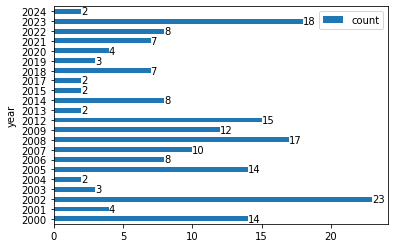

In [11]:
plot = missing_date_count_by_year.plot.barh(x='year',
             y='count')
plot.bar_label(plot.containers[0])
plot

In [12]:
missing_dates_by_year_and_month = missing_dates_df.groupby(['year', 'month']).count()
missing_dates_by_year_and_month

Date  day
year month           
2000 1         1    1
     3         1    1
     7         1    1
     9         2    2
     11        1    1
...          ...  ...
2023 9         8    8
     10        5    5
     11        1    1
     12        1    1
2024 6         2    2

[84 rows x 2 columns]

In [13]:
missing_dates_by_year_and_month = missing_dates_df.groupby(['year', 'month'])['day'].count().reset_index(name='count')
heatmap_of_missing_data = missing_dates_by_year_and_month.pivot(index='year', columns='month', values='count')
heatmap_of_missing_data

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2000,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN,1.0,8.0
2001,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN
2002,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,19.0
2003,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN
2004,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2005,NaN,NaN,NaN,NaN,1.0,3.0,2.0,1.0,6.0,1.0,NaN,NaN
2006,2.0,NaN,NaN,2.0,NaN,NaN,1.0,2.0,1.0,NaN,NaN,NaN
2007,NaN,1.0,2.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4.0
2008,NaN,NaN,2.0,1.0,3.0,NaN,1.0,2.0,1.0,NaN,3.0,4.0


<AxesSubplot: xlabel='month', ylabel='year'>

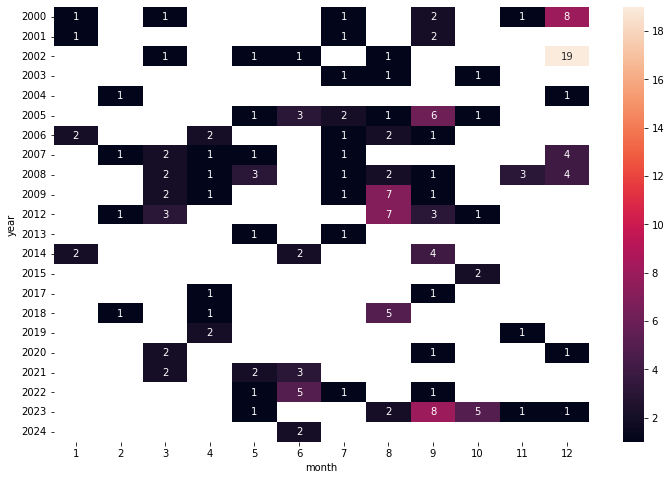

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(heatmap_of_missing_data, annot=True)

In [15]:
search_condition = (missing_dates_df['month']==5) & (missing_dates_df['year']==2008)
missing_dates_df[search_condition].sort_values(by='Date')

,Date,year,month,day
98,2008-05-25,2008,5,25
116,2008-05-26,2008,5,26
17,2008-05-27,2008,5,27


In [16]:
#Examining gaps within each year
#Categorizing gaps of data using methodology from the below article:
#https://towardsdatascience.com/handling-gaps-in-time-series-dc47ae883990/

#Methodology
#Classify missing segments as either continuous or isolated using a threshold T
#If sequence of missing observations <= T, then isolated
#If sequence > T, then continuous
import numpy as np

def count_sequences(data, time, value):
    #Indexer for non-missing data
    is_not_nan = ~data[value].isna()
    
    #Aux indexer to group sequences
    #diff and cumsum aggregate nonmissing sequences
    group_idx = is_not_nan.diff().cumsum().fillna(0)
    
    #Non-missing counter
    not_nan_counts = is_not_nan.groupby(group_idx).sum()
    
     # Instantiate sequence lengths DataFrame and retrieve position indices and time
    sequences_df = pd.Series(np.arange(len(data))).groupby(group_idx).agg(['min', 'max'])
    sequences_df['seq_start_time'] = sequences_df['min'].map(data[time])
    sequences_df['seq_end_time'] = sequences_df['max'].map(data[time])
    sequences_df['not_nan_count'] = not_nan_counts
    sequences_df['nan_count'] = (sequences_df['max'] - sequences_df['min']) - (sequences_df['not_nan_count'] - 1)

    # Assert sum of sequence lengths == total series length
    assert sum(sequences_df[['not_nan_count', 'nan_count']].sum()) == data.shape[0]

    # Tidy up
    sequences_df.rename(columns={'min': 'seq_start_idx', 'max': 'seq_end_idx'}, inplace=True)
    sequences_df.sort_values('seq_start_idx', inplace=True)
    sequences_df.reset_index(drop=True, inplace=True)

    return sequences_df

# #Combine data-ful dates with missing dates to use function
df = df.set_index('Valid Date')
df_with_gaps = df.reindex(all_possible_dates).sort_index(ascending=True)
df_with_gaps

,Clear-sky UVI,All-sky UVI
Valid Date,,
2000-01-01,1.09,0.94
2000-01-02,1.40,0.93
2000-01-03,1.41,0.60
2000-01-04,1.43,0.67
2000-01-05,1.44,1.23
...,...,...
2025-05-12,9.07,8.31
2025-05-13,9.44,4.15
2025-05-14,8.95,0.61


In [17]:
#There's no missing data for 'Valid Dates' in the original dataset, 
#so we can use either Clear-sky UVI or All-sky UVI for the count_sequences
df_with_gaps = df_with_gaps.reset_index()
df_with_gaps['is_missing'] = np.where(df_with_gaps['All-sky UVI'].isnull(), 1, 0)

sequence_df = count_sequences(df_with_gaps, 'Valid Date', 'All-sky UVI')

In [18]:
sequence_df[sequence_df['nan_count']==1]

,seq_start_idx,seq_end_idx,seq_start_time,seq_end_time,not_nan_count,nan_count
1,25,25,2000-01-26,2000-01-26,0,1
3,90,90,2000-03-31,2000-03-31,0,1
5,200,200,2000-07-19,2000-07-19,0,1
9,309,309,2000-11-05,2000-11-05,0,1
13,350,350,2000-12-16,2000-12-16,0,1
...,...,...,...,...,...,...
219,8669,8669,2023-09-26,2023-09-26,0,1
223,8693,8693,2023-10-20,2023-10-20,0,1
225,8698,8698,2023-10-25,2023-10-25,0,1
227,8721,8721,2023-11-17,2023-11-17,0,1


In [19]:
sequence_df[sequence_df['nan_count']>1]

,seq_start_idx,seq_end_idx,seq_start_time,seq_end_time,not_nan_count,nan_count
7,258,259,2000-09-15,2000-09-16,0,2
11,341,346,2000-12-07,2000-12-12,0,6
33,1077,1095,2002-12-13,2002-12-31,0,19
47,1984,1986,2005-06-07,2005-06-09,0,3
49,2017,2018,2005-07-10,2005-07-11,0,2
59,2090,2091,2005-09-21,2005-09-22,0,2
65,2220,2221,2006-01-29,2006-01-30,0,2
73,2430,2431,2006-08-27,2006-08-28,0,2
89,2896,2899,2007-12-06,2007-12-09,0,4
97,3067,3069,2008-05-25,2008-05-27,0,3


In [20]:
df_with_gaps

,Valid Date,Clear-sky UVI,All-sky UVI,is_missing
0,2000-01-01,1.09,0.94,0
1,2000-01-02,1.40,0.93,0
2,2000-01-03,1.41,0.60,0
3,2000-01-04,1.43,0.67,0
4,2000-01-05,1.44,1.23,0
...,...,...,...,...
9263,2025-05-12,9.07,8.31,0
9264,2025-05-13,9.44,4.15,0
9265,2025-05-14,8.95,0.61,0
9266,2025-05-15,8.78,6.62,0


In [21]:
for i, row in sequence_df.iterrows():
    seq_range = range(row['seq_start_idx'], row['seq_end_idx']+1)
    df_with_gaps.loc[seq_range, 'seqMissing'] = row['nan_count']
    
df_with_gaps[df_with_gaps['is_missing']==1]

,Valid Date,Clear-sky UVI,All-sky UVI,is_missing,seqMissing
25,2000-01-26,NaN,NaN,1,1.0
90,2000-03-31,NaN,NaN,1,1.0
200,2000-07-19,NaN,NaN,1,1.0
258,2000-09-15,NaN,NaN,1,2.0
259,2000-09-16,NaN,NaN,1,2.0
...,...,...,...,...,...
8698,2023-10-25,NaN,NaN,1,1.0
8721,2023-11-17,NaN,NaN,1,1.0
8763,2023-12-29,NaN,NaN,1,1.0
8922,2024-06-05,NaN,NaN,1,2.0


In [22]:
df_with_gaps.set_index('Valid Date')
#df_with_gaps.drop('index', axis=1, inplace=True)

,Clear-sky UVI,All-sky UVI,is_missing,seqMissing
Valid Date,,,,
2000-01-01,1.09,0.94,0,0.0
2000-01-02,1.40,0.93,0,0.0
2000-01-03,1.41,0.60,0,0.0
2000-01-04,1.43,0.67,0,0.0
2000-01-05,1.44,1.23,0,0.0
...,...,...,...,...
2025-05-12,9.07,8.31,0,0.0
2025-05-13,9.44,4.15,0,0.0
2025-05-14,8.95,0.61,0,0.0


In [23]:
df_with_gaps

,Valid Date,Clear-sky UVI,All-sky UVI,is_missing,seqMissing
0,2000-01-01,1.09,0.94,0,0.0
1,2000-01-02,1.40,0.93,0,0.0
2,2000-01-03,1.41,0.60,0,0.0
3,2000-01-04,1.43,0.67,0,0.0
4,2000-01-05,1.44,1.23,0,0.0
...,...,...,...,...,...
9263,2025-05-12,9.07,8.31,0,0.0
9264,2025-05-13,9.44,4.15,0,0.0
9265,2025-05-14,8.95,0.61,0,0.0
9266,2025-05-15,8.78,6.62,0,0.0


In [24]:
#Creating line plot of Clear-sky UVI and All-sky UVI over time
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')
#df = df.set_index('Valid Date')

array([<AxesSubplot: xlabel='Valid Date'>,
       <AxesSubplot: xlabel='Valid Date'>], dtype=object)

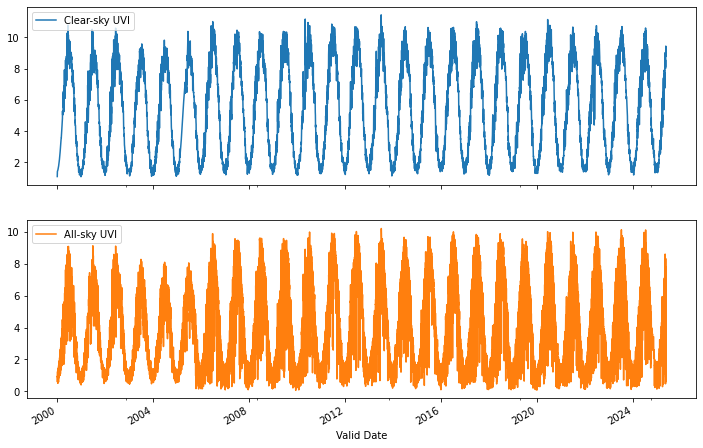

In [25]:
df.plot.line(subplots=True, figsize=(12,8))

In [26]:
#Split dates into year, month and day (for future aggregation and analysis)
import numpy as np

df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day

conditions = [df['month'].isin([1, 2, 12]), 
              df['month'].isin([3,4,5]),
              df['month'].isin([6,7,8]),
              df['month'].isin([9,10,11])]

choices = ['Winter', 'Spring', 'Summer', 'Fall']

df['season'] = np.select(conditions, choices)
df
#df[['year','month','day']] = df.index.str.split('-', expand=True)

,Clear-sky UVI,All-sky UVI,year,month,day,season
Valid Date,,,,,,
2000-01-01,1.09,0.94,2000,1,1,Winter
2000-01-02,1.40,0.93,2000,1,2,Winter
2000-01-03,1.41,0.60,2000,1,3,Winter
2000-01-04,1.43,0.67,2000,1,4,Winter
2000-01-05,1.44,1.23,2000,1,5,Winter
...,...,...,...,...,...,...
2025-05-12,9.07,8.31,2025,5,12,Spring
2025-05-13,9.44,4.15,2025,5,13,Spring
2025-05-14,8.95,0.61,2025,5,14,Spring


In [27]:
#Creating box and whisker plots to analyze distributions over time

<AxesSubplot: >

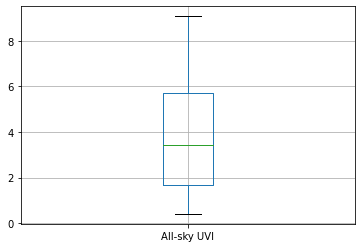

In [28]:
df[df['year']==2000].boxplot(column='All-sky UVI')

<AxesSubplot: >

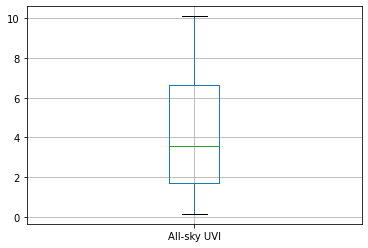

In [29]:
df[df['year']==2024].boxplot(column='All-sky UVI')

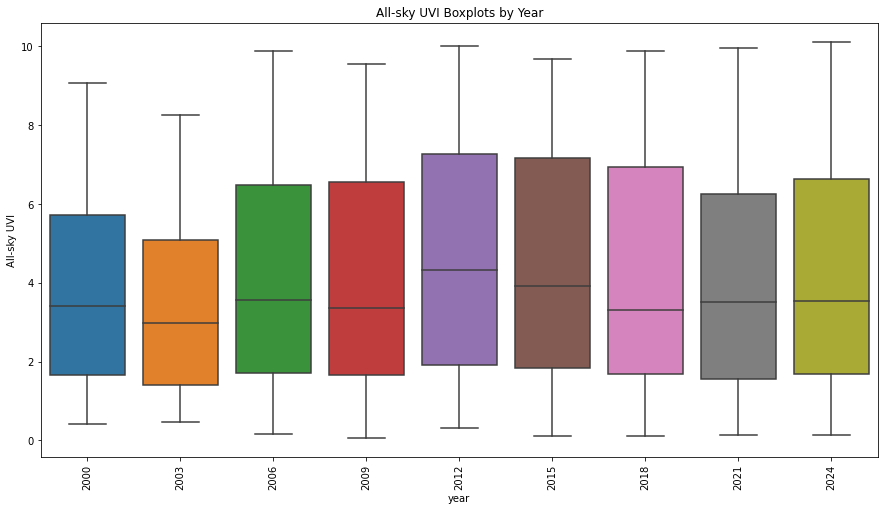

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

#Using Seaborn to create Box and whisker plots by year bc it's easier than pandas
#https://stackoverflow.com/questions/43065157/yearly-boxplots-with-pandas

plt.figure(figsize = (15,8))

years = [2000, 2003, 2006, 2009, 2012, 2015, 2018, 2021, 2024]

ax = sns.boxplot(data=df[df['year'].isin(years)], x='year', y='All-sky UVI')
ax.set_title('All-sky UVI Boxplots by Year')
for item in ax.get_xticklabels():
    item.set_rotation(90)

In [31]:
#Get descriptive stats per year (table for above box and whiskers)
df.groupby('year')['All-sky UVI'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2000,352.0,3.760966,2.300747,0.41,1.6700,3.420,5.7125,9.07
2001,361.0,3.713767,2.283234,0.50,1.5800,3.230,5.6500,9.11
2002,342.0,3.927778,2.314330,0.54,1.7225,3.575,6.1075,9.09
2003,362.0,3.350083,2.084366,0.46,1.4150,2.970,5.0725,8.26
2004,364.0,3.612363,2.149558,0.54,1.5800,3.400,5.5350,8.08
2005,351.0,3.631795,2.107356,0.16,1.6600,3.390,5.5650,8.04
2006,357.0,4.086891,2.730979,0.16,1.7100,3.560,6.4700,9.87
2007,355.0,4.365831,2.863751,0.10,1.7150,3.860,7.0650,9.55
2008,349.0,4.347335,2.827165,0.16,1.7400,3.760,7.1600,9.60


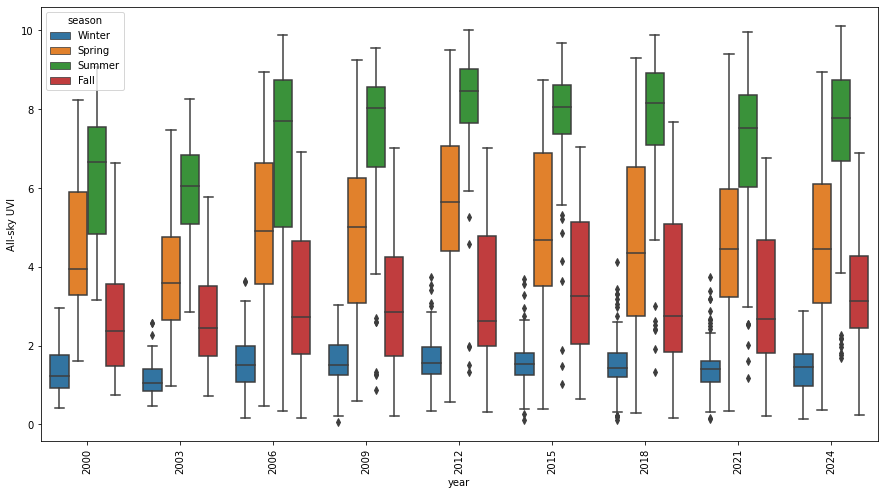

In [32]:
plt.figure(figsize = (15,8))

years = [2000, 2003, 2006, 2009, 2012, 2015, 2018, 2021, 2024]

ax = sns.boxplot(data=df[df['year'].isin(years)], x='year', y='All-sky UVI', hue='season')
for item in ax.get_xticklabels():
    item.set_rotation(90)

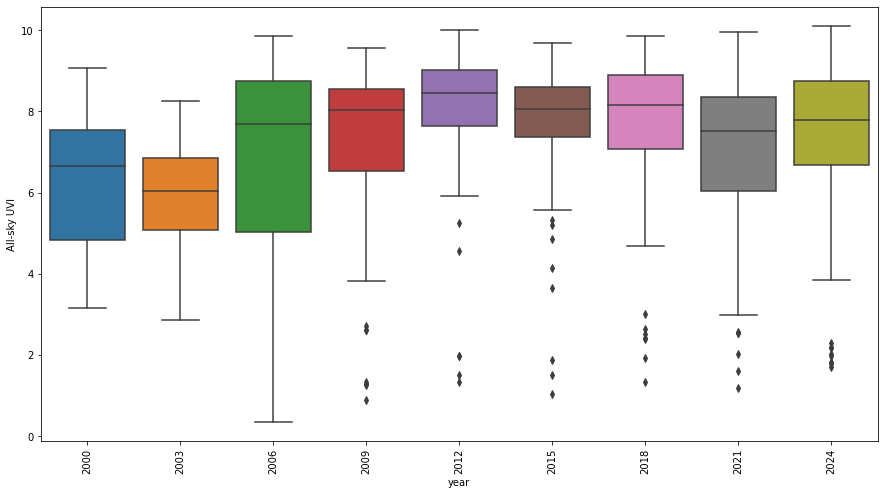

In [33]:
plt.figure(figsize = (15,8))

years = [2000, 2003, 2006, 2009, 2012, 2015, 2018, 2021, 2024]

ax = sns.boxplot(data=df[(df['year'].isin(years)) & (df['season']=='Summer')], x='year', y='All-sky UVI')
#All-sky UV index over summer months (June, July, August) by year
#analysis notes: stabilizes 2012 onward, box and whiskers for 2024
for item in ax.get_xticklabels():
    item.set_rotation(90)

In [34]:
#Data below shows that in Summer 2024, 50% of observations were >9.045 (in high index category)
#Potentially plot median across all Summers
df[df['season']=='Summer'].groupby(['year', 'season'])['Clear-sky UVI'].describe()

,,count,mean,std,min,25%,50%,75%,max
year,season,,,,,,,,
2000,Summer,91.0,8.670440,0.884313,6.89,8.2700,8.740,9.0850,10.78
2001,Summer,91.0,8.501429,0.692964,7.10,8.0500,8.410,8.8550,10.52
2002,Summer,90.0,8.508333,0.764674,7.00,7.9425,8.505,8.9575,10.59
2003,Summer,90.0,8.333778,0.687813,6.55,7.8525,8.485,8.8475,9.58
2004,Summer,92.0,8.335978,0.691277,7.07,7.7750,8.430,8.7800,9.82
2005,Summer,86.0,8.505465,0.749619,6.59,8.0500,8.480,8.8925,10.38
2006,Summer,89.0,9.289213,0.858017,7.47,8.6800,9.400,9.8800,11.01
2007,Summer,91.0,9.111538,0.717358,7.43,8.4850,9.270,9.6650,10.46
2008,Summer,89.0,9.097303,0.791375,7.69,8.2900,9.150,9.7800,10.36


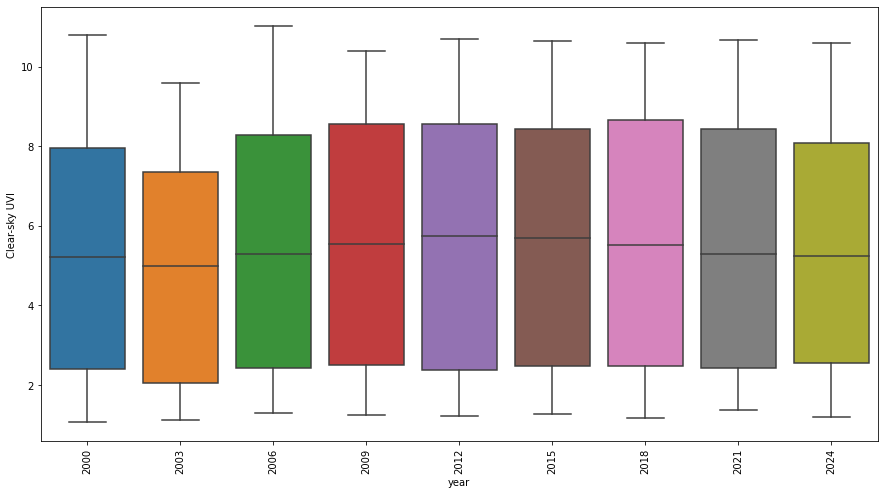

In [35]:
plt.figure(figsize = (15,8))

years = [2000, 2003, 2006, 2009, 2012, 2015, 2018, 2021, 2024]

ax = sns.boxplot(data=df[df['year'].isin(years)], x='year', y='Clear-sky UVI')
for item in ax.get_xticklabels():
    item.set_rotation(90)

In [36]:
df.groupby('year')['Clear-sky UVI'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2000,352.0,5.232415,2.856809,1.08,2.4000,5.225,7.9525,10.78
2001,361.0,5.014155,2.768875,1.15,2.1200,4.650,7.8100,10.52
2002,342.0,5.417339,2.761339,1.23,2.6150,5.720,7.9475,10.59
2003,362.0,4.938039,2.726342,1.11,2.0425,4.990,7.3575,9.58
2004,364.0,5.094863,2.764927,1.12,2.3375,5.020,7.7800,9.82
2005,351.0,5.083647,2.667847,1.23,2.4450,5.210,7.4900,10.38
2006,357.0,5.524678,3.009596,1.30,2.4400,5.280,8.2900,11.01
2007,355.0,5.554986,2.962469,1.20,2.3700,5.540,8.3950,10.46
2008,349.0,5.565903,2.955191,1.23,2.5800,5.840,8.1400,10.36


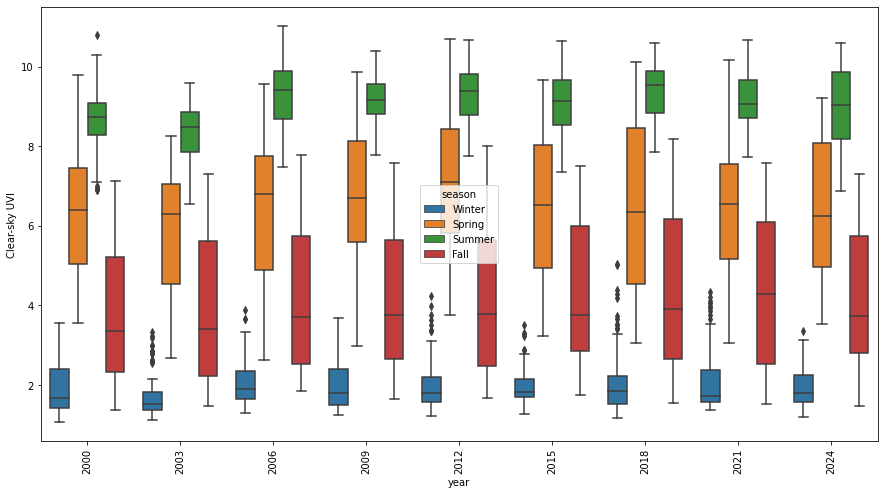

In [37]:
plt.figure(figsize = (15,8))

years = [2000, 2003, 2006, 2009, 2012, 2015, 2018, 2021, 2024]

ax = sns.boxplot(data=df[df['year'].isin(years)], x='year', y='Clear-sky UVI', hue='season')
for item in ax.get_xticklabels():
    item.set_rotation(90)

In [38]:
#Further examine descriptive stats by season
#In clear-sky UVI, 50% of values were in a dangerous UV index zone
#similarly bad results for all-sky UVI


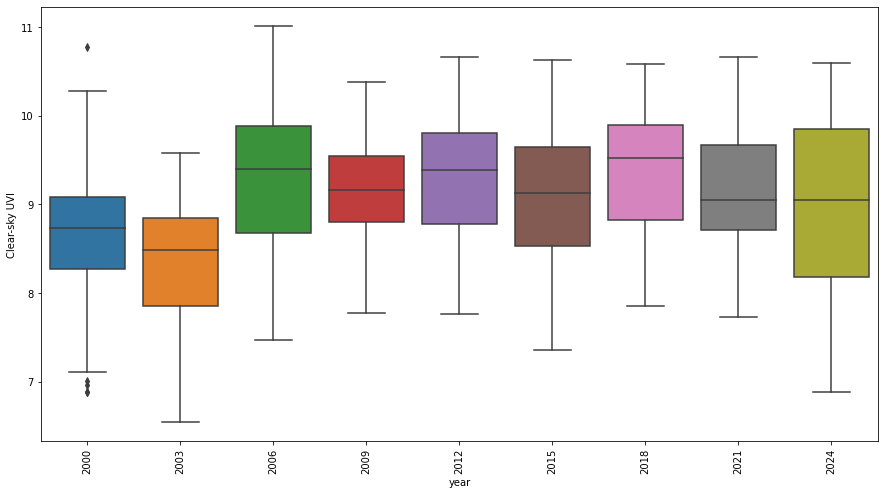

In [39]:
plt.figure(figsize = (15,8))

years = [2000, 2003, 2006, 2009, 2012, 2015, 2018, 2021, 2024]

ax = sns.boxplot(data=df[(df['year'].isin(years)) & (df['season']=='Summer')], x='year', y='Clear-sky UVI')
#standardize y-axis
for item in ax.get_xticklabels():
    item.set_rotation(90)

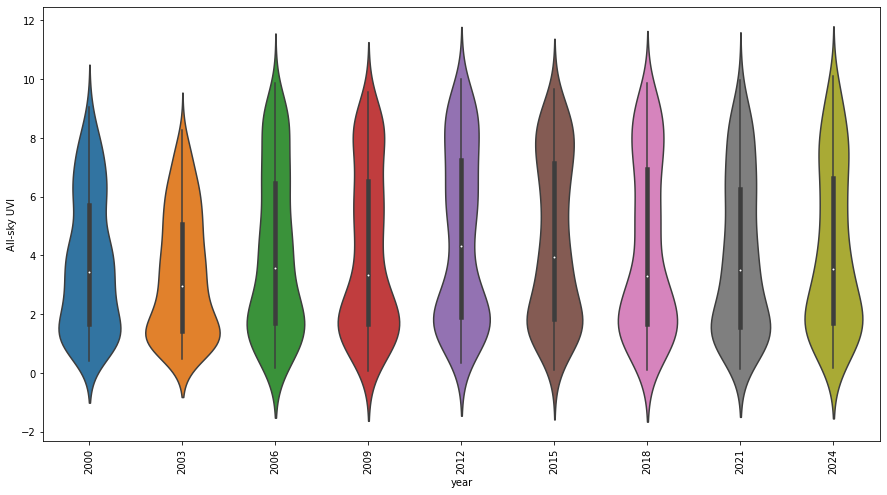

In [54]:
#Creating violin plots to understand how data is distributed better
plt.figure(figsize = (15,8))

starting_yr = 2000
ending_yr = 2024
increment = 3
years = [date for date in range(starting_yr, ending_yr+1, increment)]

ax = sns.violinplot(data=df[df['year'].isin(years)], x='year', y='All-sky UVI')
#standardize y-axis
for item in ax.get_xticklabels():
    item.set_rotation(90)

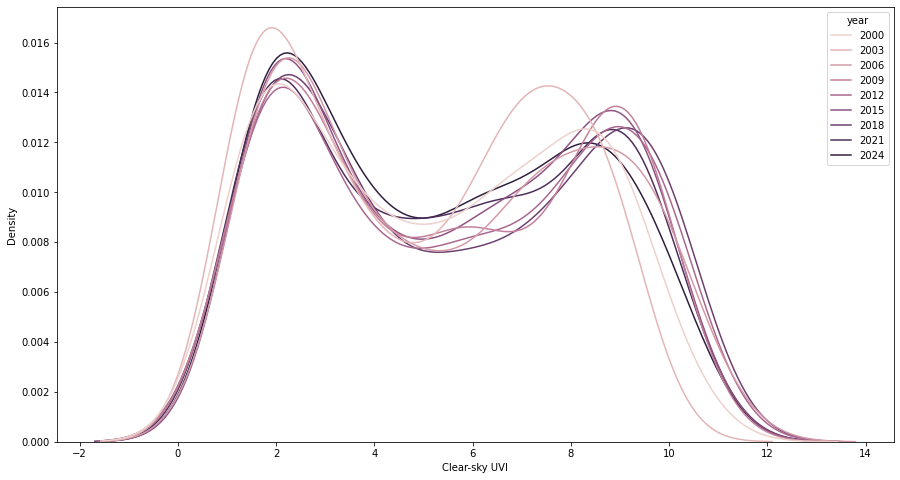

In [53]:
plt.figure(figsize = (15,8))

# starting_yr = 2012
# ending_yr = 2024
# increment = 1
# years = [date for date in range(starting_yr, ending_yr+1, increment)]

ax = sns.kdeplot(data=df[df['year'].isin(years)], x='Clear-sky UVI', hue='year')
#standardize y-axis
# for item in ax.get_xticklabels():
#     item.set_rotation(90)

In [40]:
#Splitting into dataframes between All-sky UVI and Clear-sky UVI
df_all_sky = df.drop('Clear-sky UVI', axis=1)
df_clear_sky = df.drop('All-sky UVI', axis=1)

#df_all_sky = df_all_sky.rename(columns={'All-sky UVI': 'UVI'})
#df_clear_sky = df_all_sky.rename(columns={'Clear-sky UVI': 'UVI'})
#df_clear_sky

In [41]:
#Ranges
import numpy as np

#Round UVI values to fit within defined UV ranges

conditions_all = [(df['All-sky UVI']>0) & (df['All-sky UVI']<3),
(df['All-sky UVI']>=3) & (df['All-sky UVI']<6),
(df['All-sky UVI']>=6) & (df['All-sky UVI']<8),
(df['All-sky UVI']>=8) & (df['All-sky UVI']<11),
(df['All-sky UVI']>=11)]

conditions_clear = [(df['Clear-sky UVI']>0) & (df['Clear-sky UVI']<3),
(df['Clear-sky UVI']>=3) & (df['Clear-sky UVI']<6),
(df['Clear-sky UVI']>=6) & (df['Clear-sky UVI']<8),
(df['Clear-sky UVI']>=8) & (df['Clear-sky UVI']<11),
(df['Clear-sky UVI']>=11)]
              
choices = ['low', 'moderate', 'high', 'very high', 'extreme']

df_all_sky['UV Index Category'] = np.select(conditions_all, choices, 'NA')
df_clear_sky['UV Index Category'] = np.select(conditions_clear, choices, 'NA')

In [42]:
high_ratings = ['very high', 'extreme']
df_very_high_all_sky = df_all_sky[df_all_sky['UV Index Category'].isin(high_ratings)].reset_index()
df_very_high_all_sky

,Valid Date,All-sky UVI,year,month,day,season,UV Index Category
0,2000-05-31,8.23,2000,5,31,Spring,very high
1,2000-06-01,8.57,2000,6,1,Summer,very high
2,2000-06-02,8.34,2000,6,2,Summer,very high
3,2000-06-09,9.06,2000,6,9,Summer,very high
4,2000-06-10,8.85,2000,6,10,Summer,very high
...,...,...,...,...,...,...,...
1057,2025-05-01,8.30,2025,5,1,Spring,very high
1058,2025-05-03,8.59,2025,5,3,Spring,very high
1059,2025-05-10,8.05,2025,5,10,Spring,very high
1060,2025-05-11,8.26,2025,5,11,Spring,very high


In [43]:
df_very_high_clear_sky = df_clear_sky[df_clear_sky['UV Index Category'].isin(high_ratings)].reset_index()
df_very_high_clear_sky

,Valid Date,Clear-sky UVI,year,month,day,season,UV Index Category
0,2000-05-06,8.54,2000,5,6,Spring,very high
1,2000-05-07,8.27,2000,5,7,Spring,very high
2,2000-05-08,8.11,2000,5,8,Spring,very high
3,2000-05-11,8.05,2000,5,11,Spring,very high
4,2000-05-12,8.36,2000,5,12,Spring,very high
...,...,...,...,...,...,...,...
2507,2025-05-12,9.07,2025,5,12,Spring,very high
2508,2025-05-13,9.44,2025,5,13,Spring,very high
2509,2025-05-14,8.95,2025,5,14,Spring,very high
2510,2025-05-15,8.78,2025,5,15,Spring,very high


In [44]:
def get_first(date_series):
    return pd.Series(date_series.iloc[0])

def get_last(date_series):
    return pd.Series(date_series.iloc[-1])

#Sort, then get first and last dates where UV index is high 
#https://stackoverflow.com/questions/54620016/using-multiple-lambda-functions-with-a-pandas-dataframe
observation_window = df_very_high_all_sky.groupby('year')['Valid Date'].agg([get_first, get_last])
observation_window

,get_first,get_last
year,,
2000,2000-05-31,2000-07-13
2001,2001-06-14,2001-07-03
2002,2002-05-04,2002-07-05
2003,2003-06-28,2003-07-08
2004,2004-06-23,2004-06-23
2005,2005-06-25,2005-06-25
2006,2006-05-04,2006-08-09
2007,2007-05-11,2007-08-12
2008,2008-05-28,2008-08-13


In [45]:
#Sort, then get first and last dates where UV index is high 
#https://stackoverflow.com/questions/54620016/using-multiple-lambda-functions-with-a-pandas-dataframe
observation_window_clear_sky = df_very_high_clear_sky.groupby('year')['Valid Date'].agg([get_first, get_last])
observation_window_clear_sky

,get_first,get_last
year,,
2000,2000-05-06,2000-08-14
2001,2001-05-19,2001-08-22
2002,2002-04-11,2002-08-17
2003,2003-05-21,2003-08-13
2004,2004-04-26,2004-08-16
2005,2005-06-02,2005-08-16
2006,2006-04-22,2006-08-29
2007,2007-05-07,2007-08-29
2008,2008-04-11,2008-09-06


In [46]:
#Generate plot for Clear-sky 

In [47]:
# df_very_high_all_sky[df_very_high_all_sky['year']==2005]

In [48]:
#Check if there's any missing data between these points
#Examine distribution between these points

In [49]:

import matplotlib.dates as mdates
observation_window['date_start'] = observation_window['get_first'].dt.strftime('2000-%m-%d')
observation_window['date_end'] = observation_window['get_last'].dt.strftime('2000-%m-%d')

observation_window = observation_window.drop(columns=['get_first','get_last'], axis=1)
mdates.date2num(observation_window['date_start'])

#https://stackoverflow.com/questions/54620016/using-multiple-lambda-functions-with-a-pandas-dataframe

array([11108., 11122., 11081., 11136., 11131., 11133., 11081., 11088.,
       11105., 11073., 11079., 11080., 11084., 11065., 11090., 11085.,
       11102., 11077., 11081., 11085., 11093., 11102., 11099., 11089.,
       11096., 11078.])

In [50]:
observation_window['date_start'] = mdates.date2num(observation_window['date_start'])
observation_window['date_end'] = mdates.date2num(observation_window['date_end'])

<AxesSubplot: xlabel='year'>

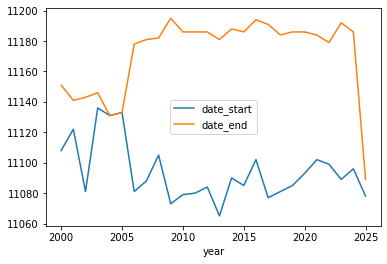

In [51]:
observation_window.plot()

In [52]:
df_all_sky[df_all_sky['UV Index Category']=='NA']

,All-sky UVI,year,month,day,season,UV Index Category
Valid Date,,,,,,


In [53]:
#Analyze classification distribution within each year-month
classification_by_month_all = df_all_sky.groupby(['year', 'month', 'UV Index Category'])['All-sky UVI'].count().reset_index(name='count')
classification_by_month_all['% of observations'] = (classification_by_month_all['count']/classification_by_month_all.groupby(['year', 'month'])['count'].transform('sum'))*100

classification_by_month_clear = df_clear_sky.groupby(['year', 'month', 'UV Index Category'])['Clear-sky UVI'].count().reset_index(name='count')
classification_by_month_clear['% of observations'] = (classification_by_month_clear['count']/classification_by_month_clear.groupby(['year', 'month'])['count'].transform('sum'))*100

#classification_by_month_all.groupby(['year', 'month'])['count'].sum()
classification_by_month_all[classification_by_month_all['year']==2003]

,year,month,UV Index Category,count,% of observations
79,2003,1,low,31,100.000000
80,2003,2,low,28,100.000000
81,2003,3,low,18,58.064516
82,2003,3,moderate,13,41.935484
83,2003,4,high,4,13.333333
84,2003,4,low,11,36.666667
85,2003,4,moderate,15,50.000000
86,2003,5,high,4,12.903226
87,2003,5,low,5,16.129032
88,2003,5,moderate,22,70.967742


In [54]:
#Creating subplots for each year
#Rewriting with more modularity
import matplotlib.pyplot as plt

color_args = {'low': 'green', 'moderate': 'yellow', 'high':'orange', 'very high': 'red', 'extreme': 'maroon'}


def generate_bar_charts(year_filter, uv_categories, values, uv_metric, nrows, ncols):

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,8), sharey=True)
    fig.suptitle(uv_metric + ' Distributions from ' + str(year_filter[0]) + ' to ' + str(year_filter[-1]), fontsize=20)
    
    df_dict = {yr: get_pivot_df(yr, uv_categories, values, uv_metric) for yr in year_filter}
    
    row=0
    col=0
    for yr,df in df_dict.items():
        df.plot(rot=0, kind='bar', ax=axes[row, col], title=yr, ylabel=values, color=color_args, stacked=False)
        if col==(ncols-1):
            col=0
            row+=1
        else:
            col+=1

    plt.tight_layout()
    plt.show()


def get_pivot_df(year, uv_categories, values, uv_metric):
    classification_df = classification_by_month_all if uv_metric=='All-sky UVI' else classification_by_month_clear
    df_temp = classification_df[(classification_df['year']==year)]
    pivot_df = df_temp.pivot(index='month', columns='UV Index Category', values=values)
    pivot_df = pivot_df[uv_categories]
    return pivot_df 

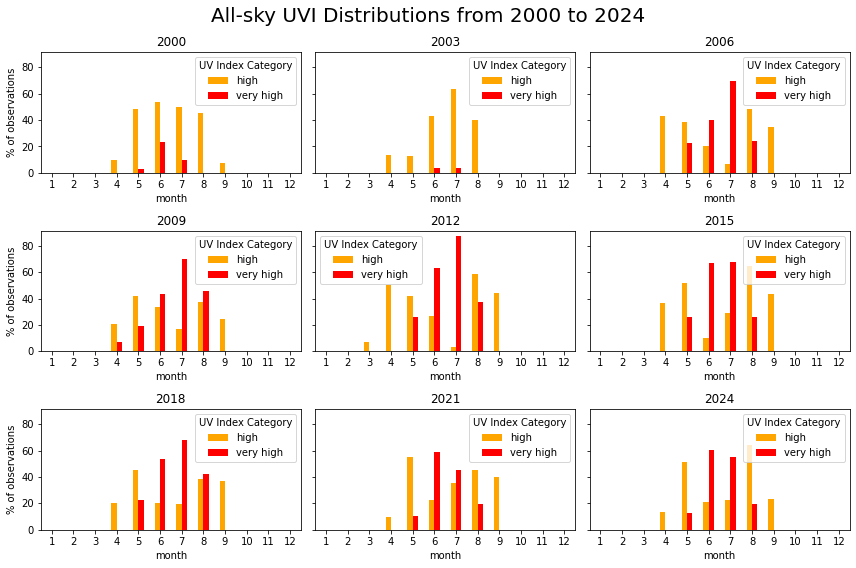

In [55]:
#Generate bar charts
#years = [2000, 2005, 2010, 2015, 2020, 2025]
years = [2000, 2003, 2006, 2009, 2012, 2015, 2018, 2021, 2024]

generate_bar_charts(year_filter=years, 
                    uv_categories=['high', 'very high'], 
                    values = '% of observations',
                    uv_metric = 'All-sky UVI',
                    nrows=3, 
                    ncols=3)

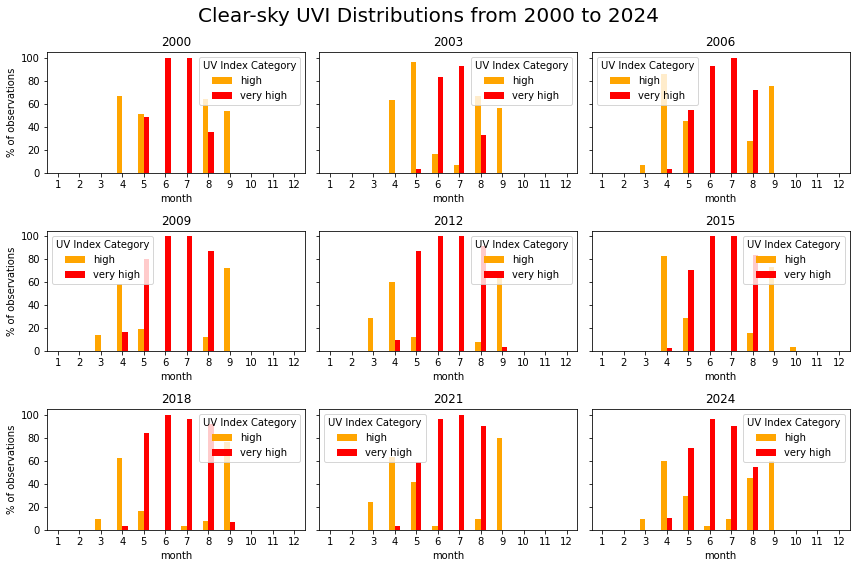

In [56]:
generate_bar_charts(year_filter=years, 
                    uv_categories=['high', 'very high'], 
                    values = '% of observations',
                    uv_metric = 'Clear-sky UVI',
                    nrows=3, 
                    ncols=3)

In [57]:
classification_by_year_all = df_all_sky.groupby(['year', 'UV Index Category'])['All-sky UVI'].count().reset_index(name='count')
#Calculate count as % of total observations for each year
classification_by_year_all['% of observations in year'] = (classification_by_year_all['count']/classification_by_year_all.groupby('year')['count'].transform('sum'))*100

In [58]:
classification_by_year_clear = df_clear_sky.groupby(['year', 'UV Index Category'])['Clear-sky UVI'].count().reset_index(name='count')
#Calculate count as % of total observations for each year
classification_by_year_clear['% of observations in year'] = (classification_by_year_clear['count']/classification_by_year_clear.groupby('year')['count'].transform('sum'))*100

<Figure size 2880x1440 with 0 Axes>

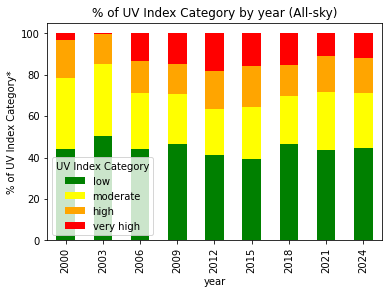

In [59]:
color_args = {'low': 'green', 'moderate': 'yellow', 'high':'orange', 'very high': 'red'}

def plot_percent_by_year(classification_by_year,title, uv_category_filter=None, yr_filter=None):
    plt.figure(figsize=(40,20)) 
    
    #Apply filters
    if yr_filter:
        classification_by_year= classification_by_year[classification_by_year['year'].isin(yr_filter)]
    # if uv_category_filter:
    #     classification_by_year = classification_by_year[classification_by_year['UV Index Category'].isin(uv_category_filter)]
    
    #Pivot to create graph
    classification_pivot_by_percent = classification_by_year.pivot(index='year', columns='UV Index Category', values='% of observations in year')
    classification_pivot_by_percent = classification_pivot_by_percent[uv_category_filter]
    classification_pivot_by_percent.plot(color=color_args, kind='bar',xlabel='year', ylabel='% of UV Index Category*', title=title, stacked=True)

#Excluding 2025 since it's still in progress and looks inaccurate
years = [2000, 2003, 2006, 2009, 2012, 2015, 2018, 2021, 2024]
uv_categories = ['low', 'moderate', 'high', 'very high']

#% of high and very high UV index by year (Clear-sky)

plot_percent_by_year(classification_by_year=classification_by_year_all, 
                     yr_filter=years, 
                     uv_category_filter=uv_categories,
                     title='% of UV Index Category by year (All-sky)')


<Figure size 2880x1440 with 0 Axes>

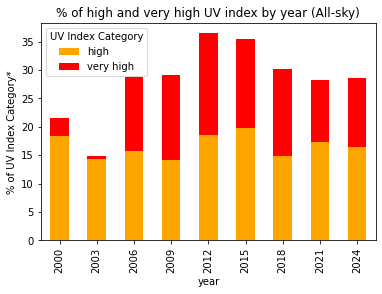

In [60]:
plot_percent_by_year(classification_by_year=classification_by_year_all, 
                     yr_filter=years, 
                     uv_category_filter=['high', 'very high'],
                    title='% of high and very high UV index by year (All-sky)')


<Figure size 2880x1440 with 0 Axes>

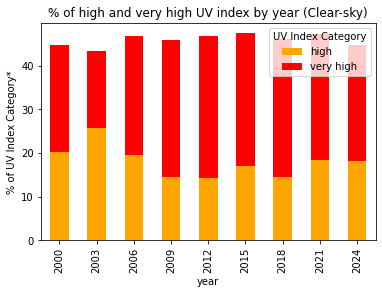

In [61]:
plot_percent_by_year(classification_by_year=classification_by_year_clear, 
                     yr_filter=years, 
                     uv_category_filter=['high', 'very high'],
                     title='% of high and very high UV index by year (Clear-sky)')

In [62]:
classification_pivot_by_count = classification_by_year.pivot(index='year', columns='UV Index Category', values='count')
#Exluding 2025 since it's still in progress and looks inaccurate
years = [2000, 2003, 2006, 2009, 2012, 2015, 2018, 2021, 2024]

classification_pivot_by_count= classification_pivot_by_count[classification_pivot_by_count.index.isin(years)]
classification_pivot_by_count = classification_pivot_by_count[['high', 'very high']]

color_args = {'low': 'green', 'moderate': 'yellow', 'high':'orange', 'very high': 'red'}
classification_pivot_by_count.plot(color=color_args, kind='bar',xlabel='year', ylabel='Count of UV Index Category', title='Count of UV Index Category by year', stacked=True)

NameError: name 'classification_by_year' is not defined

In [ ]:
#missing data check -

In [ ]:
years = [2000, 2005, 2010, 2015, 2020, 2025]
df_all_sky_filtered = df_all_sky[df_all_sky['year'].isin(years)]

#Using sns lineplot bc hue argument makes it easier to do seperate lines by year
sns.lineplot(data=df_all_sky_filtered, x='month', y='All-sky UVI', hue='year')

In [ ]:
#f_all_sky['month_day'] = df_all_sky['month'] + '/' + df_all_sky['day']

In [ ]:
#classification_pivot[~classification_pivot.index.isin([2025])]

In [ ]:
#df.groupby(['year'])['Clear-sky UVI', 'All-sky UVI'].agg(['min', 'max'])

In [ ]:
#Todo:
#Impute missing data 
#Time Series Analysis: Decomposition

In [63]:
#Running decomposition into Observed, Trend, Seasonal and Residual
#https://www.kdnuggets.com/2020/11/analyzing-time-series.html
#https://stackoverflow.com/questions/60017052/decompose-for-time-series-valueerror-you-must-specify-a-period-or-x-must-be
%pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

Note: you may need to restart the kernel to use updated packages.


In [65]:
df_with_gaps

,Valid Date,Clear-sky UVI,All-sky UVI,is_missing,seqMissing
0,2000-01-01,1.09,0.94,0,0.0
1,2000-01-02,1.40,0.93,0,0.0
2,2000-01-03,1.41,0.60,0,0.0
3,2000-01-04,1.43,0.67,0,0.0
4,2000-01-05,1.44,1.23,0,0.0
...,...,...,...,...,...
9263,2025-05-12,9.07,8.31,0,0.0
9264,2025-05-13,9.44,4.15,0,0.0
9265,2025-05-14,8.95,0.61,0,0.0
9266,2025-05-15,8.78,6.62,0,0.0


In [57]:
#Analyzing changes in UVI values over time - Is either the Clear-sky UVI or All-sky UVI increasing?
#ie, are there trends or seasonal patterns?
#https://builtin.com/data-science/time-series-python

#First checking for stationarity
#Null hypothesis : there is no stationarity
from statsmodels.tsa.stattools import adfuller

adft = adfuller(df['Clear-sky UVI'], autolag="AIC")

output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})

print("Clear-sky UVI : Dickey-Fuller Test \n")
print(output_df)

Clear-sky UVI : Dickey-Fuller Test 

         Values                       Metric
0 -1.261496e+01              Test Statistics
1  1.624434e-23                      p-value
2  3.800000e+01             No. of lags used
3  9.044000e+03  Number of observations used
4 -3.431073e+00          critical value (1%)
5 -2.861860e+00          critical value (5%)
6 -2.566940e+00         critical value (10%)


In [59]:
adft = adfuller(df['All-sky UVI'], autolag="AIC")

output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})

print("All-sky UVI : Dickey-Fuller Test \n")
print(output_df)

All-sky UVI : Dickey-Fuller Test 

         Values                       Metric
0 -7.098333e+00              Test Statistics
1  4.231718e-10                      p-value
2  3.800000e+01             No. of lags used
3  9.044000e+03  Number of observations used
4 -3.431073e+00          critical value (1%)
5 -2.861860e+00          critical value (5%)
6 -2.566940e+00         critical value (10%)


In [ ]:
#https://medium.com/@ritusantra/tests-for-stationarity-in-time-series-dickey-fuller-test-augmented-dickey-fuller-adf-test-d2e92e214360
#Test statistic is less than critical value is both cases, so we reject the null hypothesis. Both time series are stationary
#https://hex.tech/blog/stationarity-in-time-series/

In [ ]:
#KPSS Test

<function matplotlib.pyplot.show(close=None, block=None)>

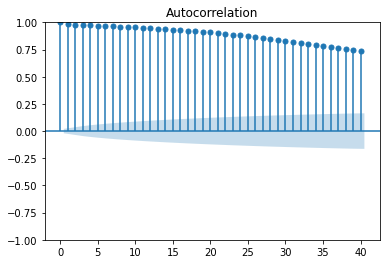

In [60]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['Clear-sky UVI'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

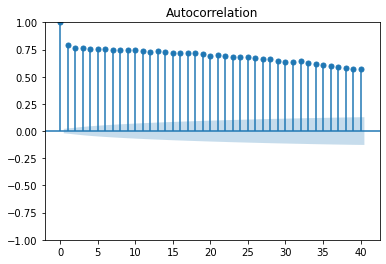

In [61]:
plot_acf(df['All-sky UVI'])
plt.show

In [84]:
df['Clear-sky UVI'].rolling(30).mean()

Valid Date
2000-01-01         NaN
2000-01-02         NaN
2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
                ...   
2025-05-12    7.768667
2025-05-13    7.895333
2025-05-14    7.965000
2025-05-15    8.023333
2025-05-16    8.144667
Name: Clear-sky UVI, Length: 9083, dtype: float64

In [90]:
result = seasonal_decompose(df['Clear-sky UVI'], model='multiplicative', period=1)
result.trend

Valid Date
2000-01-01    1.09
2000-01-02    1.40
2000-01-03    1.41
2000-01-04    1.43
2000-01-05    1.44
              ... 
2025-05-12    9.07
2025-05-13    9.44
2025-05-14    8.95
2025-05-15    8.78
2025-05-16    9.01
Name: trend, Length: 9083, dtype: float64

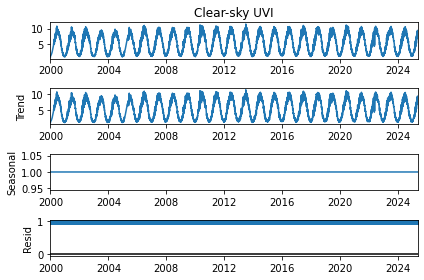

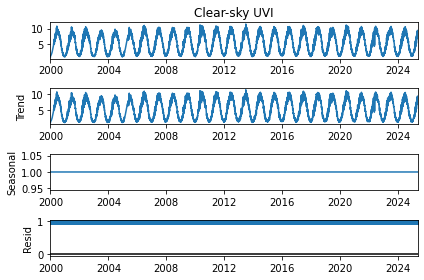

In [91]:
result.plot()
#https://medium.com/@heyamit10/time-series-decomposition-in-python-049b72a00ba0

In [ ]:
df.dtypes

In [ ]:
df = df.drop('Valid Date', axis=1)

In [ ]:
df.groupby(['year', 'month'])['Clear-sky UVI', 'All-sky UVI'].median()

In [ ]:
df.groupby(['year', 'month'])['Clear-sky UVI', 'All-sky UVI'].max()

In [ ]:
#add a season column
#winter: Dec - Feb
#spring: March - May
#Summer: June - Aug
#Fall: Sep - November
def get_season_for_month_num(month):
    if month in (12,1,2):
        return "Winter"
    elif month in (3,4,5):
        return "Spring"
    elif month in (6,7,8):
        return "Summer"
    elif month in (9,10,11):
        return "Fall"
    

In [ ]:
df['month'].unique()
int('06')

In [ ]:
df['season'] = df['month'].apply(lambda x: get_season_for_month_num(int(x)))

In [ ]:
df_agg_by_seasons = df.copy()
#can pass multiple agg functions using .agg 
df_agg_by_seasons.groupby(['year', 'season'])['Clear-sky UVI', 'All-sky UVI'].agg(['min', 'max'])